Name: JOEL RAJU

Batch: R1

Date: 18-02-2023

Experiment Name: 2.1 CIFAR 10 classification

Experiment Description: The experiment aims at designing a CNN classification model for classifying data in 10 classes of CIFAR10 dataset


Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


Load the dataset


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)



Here we see there are 50000 training images and 1000 test images


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)



y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array


In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]



Let's plot some images to see what they are


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

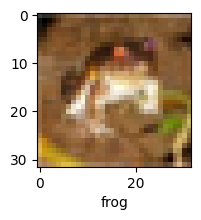

In [ ]:
plot_sample(X_train, y_train, 0)

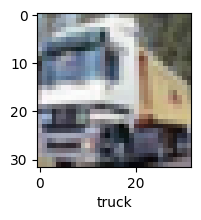

In [ ]:
plot_sample(X_train, y_train, 1)

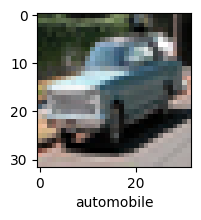

In [ ]:
plot_sample(X_train, y_train, 32)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


Now let us build a convolutional neural network to train our images


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.save("model1_cifar_10epoch.h5")

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9486 - accuracy: 0.7004


[0.9485680460929871, 0.7003999948501587]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.3922175e-03, 1.3398328e-05, 6.6172180e-04, 7.7083528e-01,
        4.6257679e-03, 6.0843378e-02, 1.4963762e-01, 1.4607688e-05,
        1.1951062e-02, 2.4944415e-05],
       [3.5305307e-04, 1.7569494e-03, 2.1624613e-08, 7.4639075e-07,
        4.4028553e-08, 3.2823504e-08, 4.7027315e-10, 1.2071056e-09,
        9.9780846e-01, 8.0661775e-05],
       [3.1361531e-02, 6.7903385e-02, 2.8627694e-05, 2.4173849e-03,
        1.8892855e-04, 3.3639290e-04, 7.6107674e-05, 4.3714611e-04,
        8.8501757e-01, 1.2232936e-02],
       [7.6470459e-01, 2.7657400e-03, 8.8715464e-02, 5.3018359e-03,
        1.8599236e-02, 1.5559231e-04, 9.1737413e-05, 5.0692612e-05,
        1.1750364e-01, 2.1113714e-03],
       [4.4483480e-07, 7.1306094e-05, 2.2881722e-02, 3.8928550e-02,
        8.3417284e-01, 9.0022298e-04, 1.0303253e-01, 1.1130903e-06,
        1.0658111e-05, 6.6615985e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

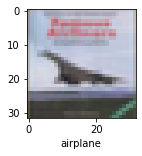

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

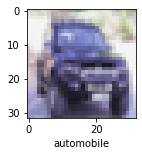

In [ ]:
plot_sample(X_test, y_test,9)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


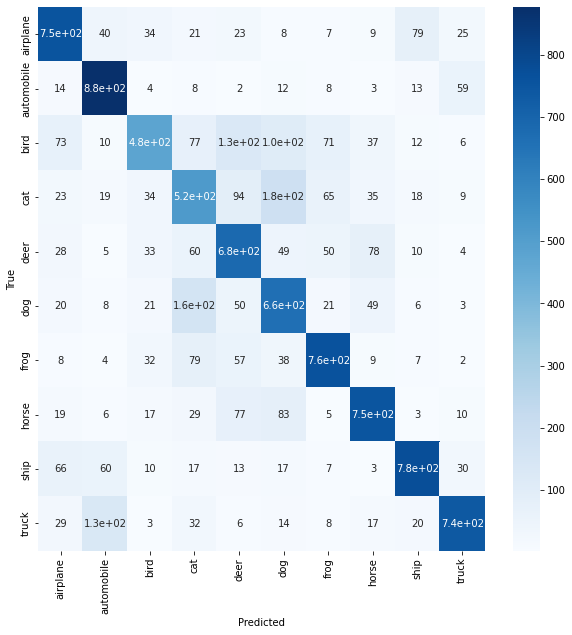

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_classes)
# Visualize the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()